### Perceptron 


### artifical neuron and the simplest form of a neural network and used for binary classification tasks, it takes several binary inputs , applies weights to them , sums them up and passes the result through an activation function 

![A Perceptron diagram](images/perceptron.png " simple diagram")

y=f(∑(wi​⋅xi​)+b)

In [1]:
import numpy as np 

In [2]:
import matplotlib.pyplot as plt

In [3]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y_and = np.array([0,0,0,1])  # AND gate
y_or = np.array([0,1,1,1])
y_xor = np.array([0,1,1,0]) # XOR gate

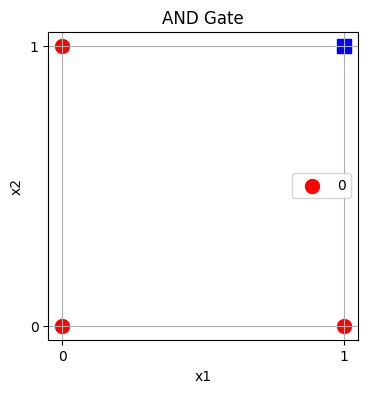

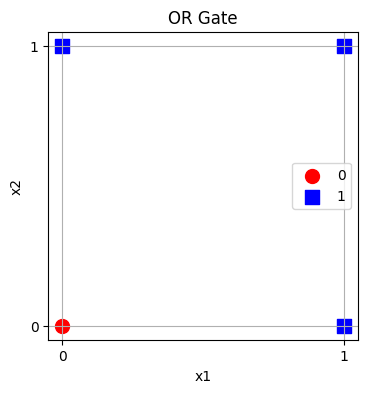

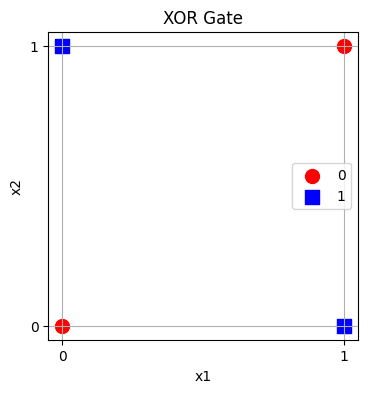

In [5]:
def plot_logic(X, y, title):
    plt.figure(figsize=(4,4))
    for i, point in enumerate(X):
        if y[i] == 0:
            plt.scatter(point[0], point[1], c='red', marker='o', s=100, label="0" if i == 0 else "")
        else:
            plt.scatter(point[0], point[1], c='blue', marker='s', s=100, label="1" if i == 1 else "")
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.xticks([0,1])
    plt.yticks([0,1])
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot AND, OR, XOR
plot_logic(X, y_and, "AND Gate")
plot_logic(X, y_or, "OR Gate")
plot_logic(X, y_xor, "XOR Gate")

##### AND Gate it is linearly separable with a linear line 

##### OR Gate it is linearly seperable with a linear line 

#####  XOR Gate it cannot be seperated with a single line that's when Multi Neural Networks Comes in 

In [6]:
### Now implementing a simple perceptron for AND and OR gates and XOR gates 




class Perceptron:
    def __init__(self,input_size,learning_rate=0.1):
        self.weights = np.zeros(input_size)
        self.lr = learning_rate
        self.bias = 0
    def activation_fn(self,x):
        return 1 if x>=0 else 0
    
    def predict(self,x):
        z = np.dot(x,self.weights)+self.bias
        a = self.activation_fn(z)
        return a
    
    def fit(self,X,y,epochs=10):
        for _ in range(epochs):
            for idx,x_i in enumerate(X):
                y_pred = self.predict(x_i)
                update = self.lr * (y[idx]-y_pred)
                self.weights += update * x_i
                self.bias += update

            

In [8]:
p_and = Perceptron(input_size=2)
p_and.fit(X,y_and,epochs=10) 

print("AND Gate Predictions:")
for x in X:
    print(f"Input: {x}, Predicted: {p_and.predict(x)}")


p_or = Perceptron(input_size=2)
p_or.fit(X,y_or,epochs=10)
print("OR Gate Predictions:")
for x in X:
    print(f"Input: {x}, Predicted: {p_or.predict(x)}")


p_xor = Perceptron(input_size=2)
p_xor.fit(X,y_xor,epochs=10)
print("XOR Gate Predictions:")
for x in X:
    print(f"Input: {x}, Predicted: {p_xor.predict(x)}")

AND Gate Predictions:
Input: [0 0], Predicted: 0
Input: [0 1], Predicted: 0
Input: [1 0], Predicted: 0
Input: [1 1], Predicted: 1
OR Gate Predictions:
Input: [0 0], Predicted: 0
Input: [0 1], Predicted: 1
Input: [1 0], Predicted: 1
Input: [1 1], Predicted: 1
XOR Gate Predictions:
Input: [0 0], Predicted: 1
Input: [0 1], Predicted: 1
Input: [1 0], Predicted: 0
Input: [1 1], Predicted: 0



sigmoid

$\sigma(x) = \frac{1}{1 + e^{-x}}$



In [11]:
### activation layer 

def sigmoid(z):
    return 1 / (1+np.exp(-z))


### compute Loss 

L = - [y * log(p) + (1 - y) * log(1 - p)]

In [13]:
## if y and p are array then np mean if not no need 

def compute_loss(y,p):

    return -np.mean(y * np.log(p) + (1-y) * np.log(1 - p))

In [29]:
### Now implementing a multi layer perceptron for XOR gate

class MLP:
    def __init__(self,input_size,hidden_size,output_size,learning_rate=0.1):
        np.random.seed(42)
        self.W1 = np.random.randn(input_size,hidden_size)
        self.b1 = np.random.randn(1,hidden_size)
        self.W2 = np.random.randn(hidden_size,output_size)
        self.b2 = np.random.randn(1,output_size)
        self.lr = learning_rate
    def compute_loss(self,y,p):
        return -np.mean( y * np.log(p) + (1-y) * np.log(1-p))
    
    def sigmoid(self,z):
        return 1 / (1+ np.exp(-z))
    
    def sigmoid_dervative(self,a):
        return a * (1 - a)
    
    def forward(self,X):

        self.z1 = np.dot(X,self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)

        self.z2 = np.dot(self.a1,self.W2) + self.b2 

        self.a2 = self.sigmoid(self.z2)

        return self.a2 
    
    def backward(self,X,y):

        d_a2 = self.a2 - y 

        d_z2 = d_a2 * self.sigmoid_dervative(self.a2)

        dW2 =  np.dot(self.a1.T,d_z2)

        db2 = np.sum(d_z2,axis=0,keepdims=True)

        
        d_a1 = np.dot(d_z2,self.W2.T)

        d_z1 = d_a1 * self.sigmoid_dervative(self.a1)

        dW1 = np.dot(X.T,d_z1)
        db1 = np.sum(d_z1,axis=0,keepdims=True)

        self.W2 -= self.lr * dW2 
        self.b2 -= self.lr * db2 
        self.W1 -= self.lr * dW1 
        self.b1 -= self.lr * db1 

    def train(self,X,y,epochs=1000):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X,y)

            if epoch % 100 == 0:
                loss = np.mean((y-self.a2)**2)
                print(f"Epoch {epoch} Loss :{loss:.4f}")
                

    def predict(self,X):
        output = self.forward(X)
        return np.round(output)
    







In [21]:
np.random.randn(2,2)

array([[ 0.54256004, -0.46341769],
       [-0.46572975,  0.24196227]])

In [35]:
mlp = MLP(input_size=2,hidden_size=2,output_size=1,learning_rate=0.1)

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])


mlp.train(X,y,epochs=10000)



Epoch 0 Loss :0.2944
Epoch 100 Loss :0.2516
Epoch 200 Loss :0.2512
Epoch 300 Loss :0.2508
Epoch 400 Loss :0.2504
Epoch 500 Loss :0.2499
Epoch 600 Loss :0.2493
Epoch 700 Loss :0.2486
Epoch 800 Loss :0.2475
Epoch 900 Loss :0.2461
Epoch 1000 Loss :0.2444
Epoch 1100 Loss :0.2423
Epoch 1200 Loss :0.2398
Epoch 1300 Loss :0.2369
Epoch 1400 Loss :0.2336
Epoch 1500 Loss :0.2298
Epoch 1600 Loss :0.2254
Epoch 1700 Loss :0.2205
Epoch 1800 Loss :0.2151
Epoch 1900 Loss :0.2094
Epoch 2000 Loss :0.2035
Epoch 2100 Loss :0.1977
Epoch 2200 Loss :0.1920
Epoch 2300 Loss :0.1866
Epoch 2400 Loss :0.1815
Epoch 2500 Loss :0.1766
Epoch 2600 Loss :0.1720
Epoch 2700 Loss :0.1676
Epoch 2800 Loss :0.1632
Epoch 2900 Loss :0.1586
Epoch 3000 Loss :0.1533
Epoch 3100 Loss :0.1469
Epoch 3200 Loss :0.1381
Epoch 3300 Loss :0.1264
Epoch 3400 Loss :0.1126
Epoch 3500 Loss :0.0985
Epoch 3600 Loss :0.0852
Epoch 3700 Loss :0.0731
Epoch 3800 Loss :0.0627
Epoch 3900 Loss :0.0538
Epoch 4000 Loss :0.0463
Epoch 4100 Loss :0.0402
Epoc

In [36]:
pred = mlp.predict(X)
for i, x in enumerate(X):
    print(f"Input: {x}, Predicted: {pred[i][0]}")

Input: [0 0], Predicted: 0.0
Input: [0 1], Predicted: 1.0
Input: [1 0], Predicted: 1.0
Input: [1 1], Predicted: 0.0


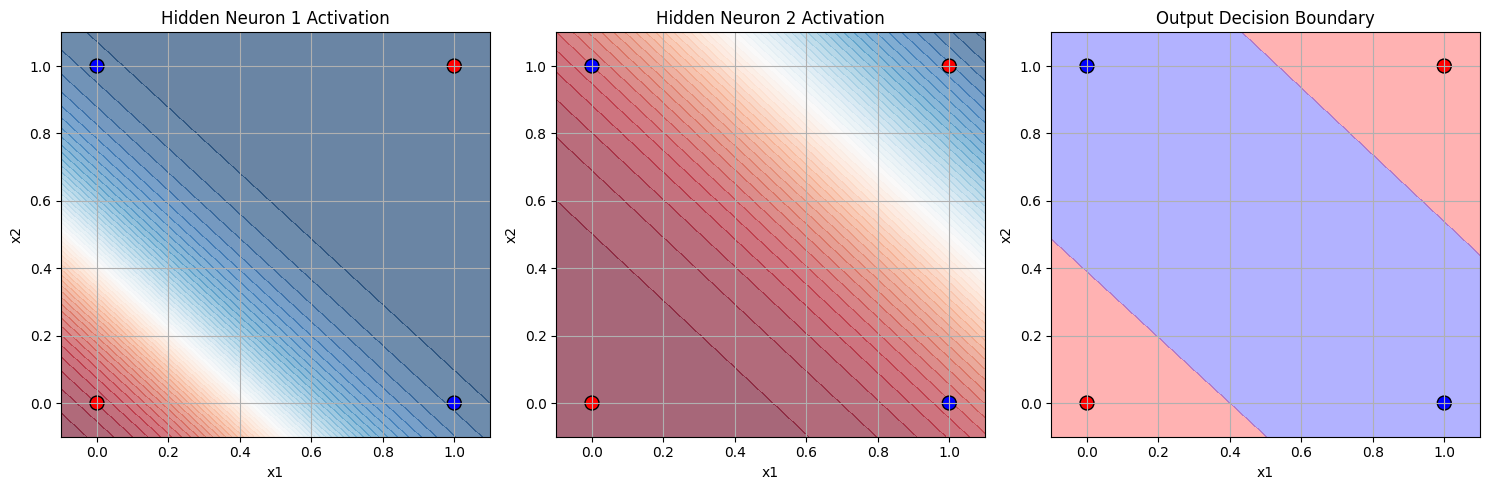

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Create a mesh grid over input space
xx, yy = np.meshgrid(np.linspace(-0.1, 1.1, 200), np.linspace(-0.1, 1.1, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Forward pass for hidden layer activations
a1_activations = np.array([mlp.sigmoid(np.dot(x.reshape(1,-1), mlp.W1) + mlp.b1)[0] for x in grid])
a1_activations = a1_activations.reshape(xx.shape + (2,))  # shape: (grid_x, grid_y, 2)

# Forward pass for output
Z = np.array([mlp.forward(x.reshape(1,-1))[0,0] for x in grid])
Z = Z.reshape(xx.shape)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15,5))

# Hidden neuron 1 activation
axes[0].contourf(xx, yy, a1_activations[:,:,0], levels=50, cmap='RdBu', alpha=0.6)
axes[0].scatter([0,0,1,1],[0,1,0,1], c=['red','blue','blue','red'], edgecolors='k', s=100)
axes[0].set_title('Hidden Neuron 1 Activation')

# Hidden neuron 2 activation
axes[1].contourf(xx, yy, a1_activations[:,:,1], levels=50, cmap='RdBu', alpha=0.6)
axes[1].scatter([0,0,1,1],[0,1,0,1], c=['red','blue','blue','red'], edgecolors='k', s=100)
axes[1].set_title('Hidden Neuron 2 Activation')

# Output decision boundary
axes[2].contourf(xx, yy, Z, levels=[-0.1,0.5,1.1], colors=['red','blue'], alpha=0.3)
axes[2].scatter([0,0,1,1],[0,1,0,1], c=['red','blue','blue','red'], edgecolors='k', s=100)
axes[2].set_title('Output Decision Boundary')

for ax in axes:
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.grid(True)

plt.tight_layout()
plt.show()
